In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [2]:
df=pd.read_csv('housing.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#let view our Dataset

df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [4]:
df.describe().style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_house_value'>

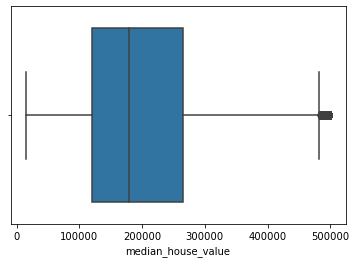

In [5]:
#we have High varaince in our dataset
#so definitely Outliers is present ✅✅✅
#let confirm by using The median_house_value

sns.boxplot(df['median_house_value'])

In [6]:
#am going to be using Z_score to detect the outliers by using def function

def box_plot_calculation(df):
    df=df.values
    q25,q75=np.percentile(df,25),np.percentile(df,75)
    print('Quartile 25:{}|Quuartile 75:{}'.format(q25,q75))
    iqr=q75-q25
    print('iqr:{}'.format(iqr))
    cut_off=iqr*1.5
    min,max=q25-cut_off,q75+cut_off
    print('cut_off:{}'.format(cut_off))
    print('Minimum:{}'.format(min))
    print('Maximum:{}'.format(max))
    outliers=[x for x in df if x < min or x > max]
    outliers.sort()
    print('features Outlier:[]'.format(len(outliers)))
    print('Outlier:{}'.format(outliers))

In [7]:
box_plot_calculation(df['median_house_value'])

Quartile 25:119600.0|Quuartile 75:264725.0
iqr:145125.0
cut_off:217687.5
Minimum:-98087.5
Maximum:482412.5
features Outlier:[]
Outlier:[482700.0, 482900.0, 483100.0, 483300.0, 483300.0, 483300.0, 483300.0, 483300.0, 483300.0, 483500.0, 483600.0, 483700.0, 483800.0, 484100.0, 484600.0, 484600.0, 484700.0, 485000.0, 485000.0, 485000.0, 485100.0, 485300.0, 485300.0, 485400.0, 485700.0, 486400.0, 486800.0, 486900.0, 487000.0, 487100.0, 487200.0, 487500.0, 487800.0, 488500.0, 488900.0, 488900.0, 489000.0, 489600.0, 489800.0, 490000.0, 490300.0, 490400.0, 490800.0, 490800.0, 491200.0, 491200.0, 492000.0, 492200.0, 492300.0, 492500.0, 492500.0, 492900.0, 493000.0, 493200.0, 493300.0, 493400.0, 493800.0, 494000.0, 494400.0, 494700.0, 495400.0, 495500.0, 495500.0, 495500.0, 495600.0, 495600.0, 495800.0, 495900.0, 496000.0, 496400.0, 496400.0, 497400.0, 497600.0, 498400.0, 498600.0, 498700.0, 498800.0, 499000.0, 499100.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 500000.0, 5000

In [8]:
#i said it Outliers is present

df_one=df[df['median_house_value']<=430000]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_house_value'>

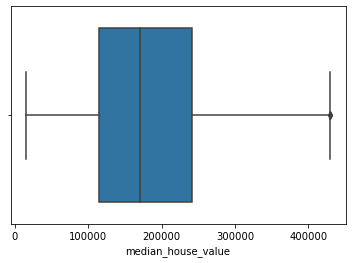

In [9]:
sns.boxplot(df_one['median_house_value'])

In [10]:
#outliers gone,we move to Exploratory data Analysis
#let check for our size And row shape

df_one.shape

(19179, 10)

In [11]:
#we left with 19179 rows

df_one

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
#we gat some name to replace for purpose of visulization

dff=df_one.copy()

In [13]:
dff=dff.rename(columns={'housing_median_age':'House_Age','median_house_value':'House_value'})

In [14]:
dff

,longitude,latitude,House_Age,total_rooms,total_bedrooms,population,households,median_income,House_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
dff.corr(method='pearson')

,longitude,latitude,House_Age,total_rooms,total_bedrooms,population,households,median_income,House_value
longitude,1.000000,-0.923783,-0.101271,0.046283,0.071980,0.103357,0.057960,-0.009490,-0.044901
latitude,-0.923783,1.000000,0.005746,-0.033923,-0.069419,-0.116551,-0.074695,-0.075574,-0.155232
House_Age,-0.101271,0.005746,1.000000,-0.374539,-0.329735,-0.293673,-0.312060,-0.206783,0.048336
total_rooms,0.046283,-0.033923,-0.374539,1.000000,0.935628,0.859556,0.922197,0.224887,0.149778
total_bedrooms,0.071980,-0.069419,-0.329735,0.935628,1.000000,0.879102,0.978945,0.026570,0.084298
population,0.103357,-0.116551,-0.293673,0.859556,0.879102,1.000000,0.909337,0.048652,0.028417
households,0.057960,-0.074695,-0.312060,0.922197,0.978945,0.909337,1.000000,0.051167,0.106337
median_income,-0.009490,-0.075574,-0.206783,0.224887,0.026570,0.048652,0.051167,1.000000,0.640149
House_value,-0.044901,-0.155232,0.048336,0.149778,0.084298,0.028417,0.106337,0.640149,1.000000


In [16]:
#few Negative correlation
#more positive correlation

In [17]:
dff['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
#let deal with The Longtitude string (-) value because with that it won't allow us to visualize

dff['longitude']=dff['longitude'].abs()

In [19]:
dff.head(3)

,longitude,latitude,House_Age,total_rooms,total_bedrooms,population,households,median_income,House_value,ocean_proximity
1,122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


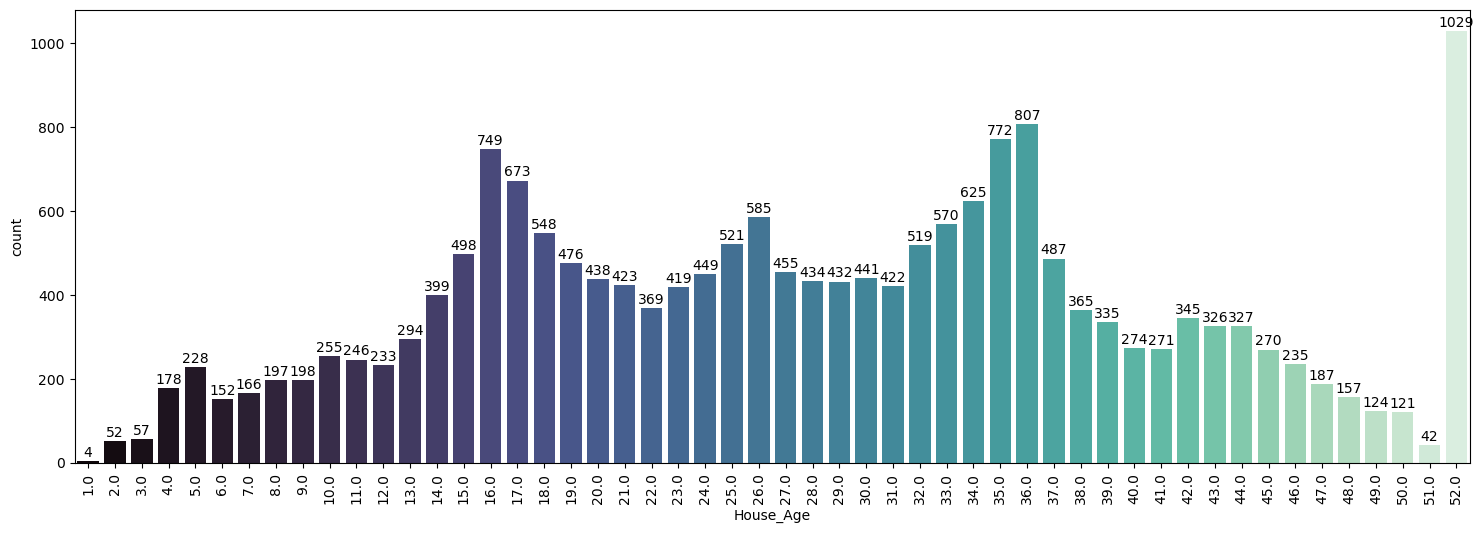

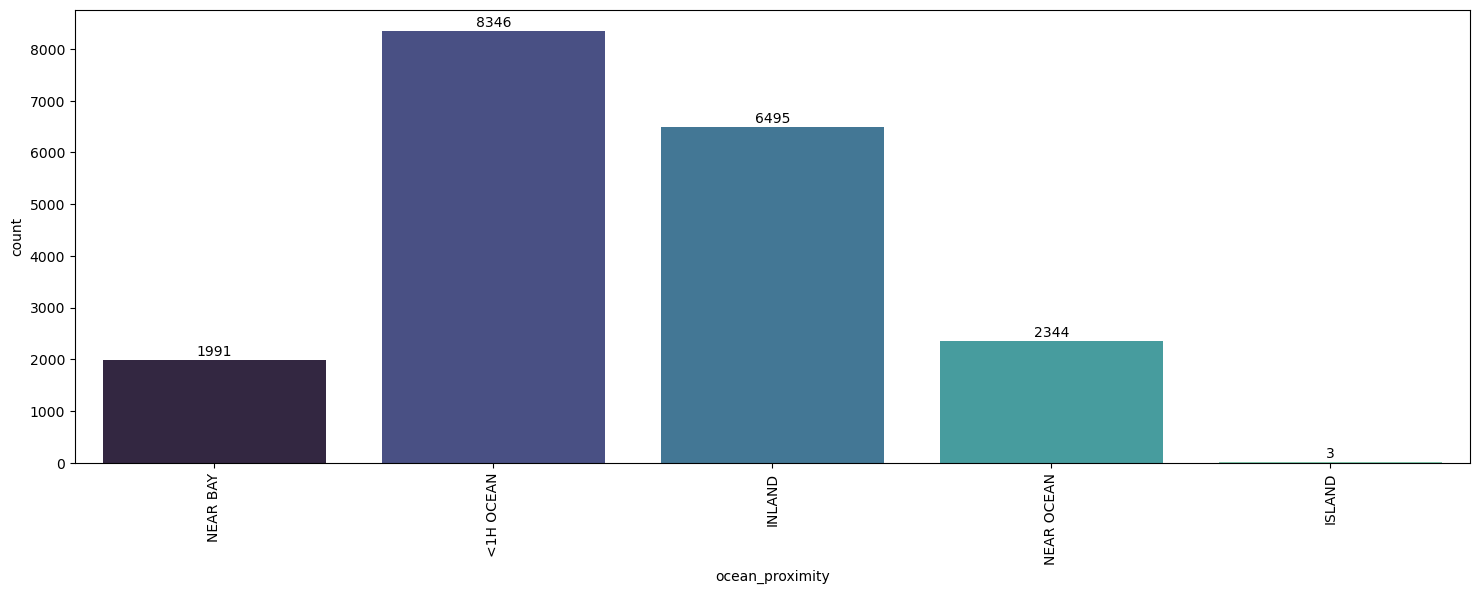

In [20]:
for i,col in enumerate(dff.drop(columns=['longitude','latitude','total_rooms','total_bedrooms','population','households','median_income','House_value'],axis=1)):
    plt.figure(figsize=(18,6),dpi=100)
    fig=sns.countplot(data=dff,x=col,palette='mako')
    plt.xticks(rotation=90)
    for container in fig.containers:
        fig.bar_label(container,label_type='edge',padding=1)

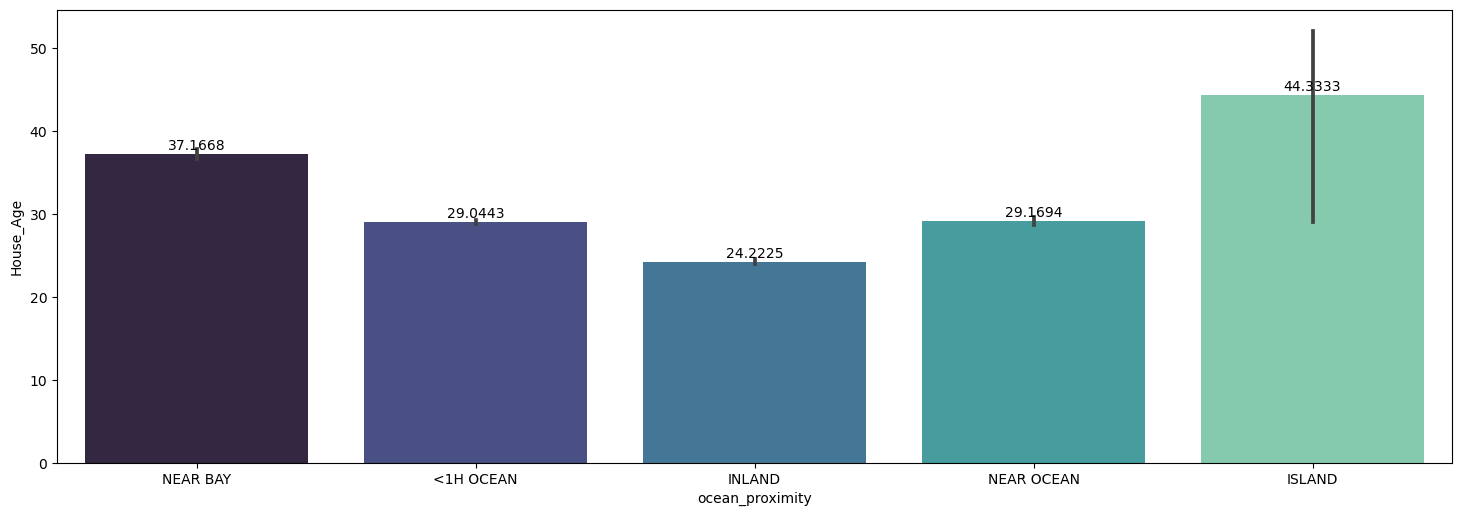

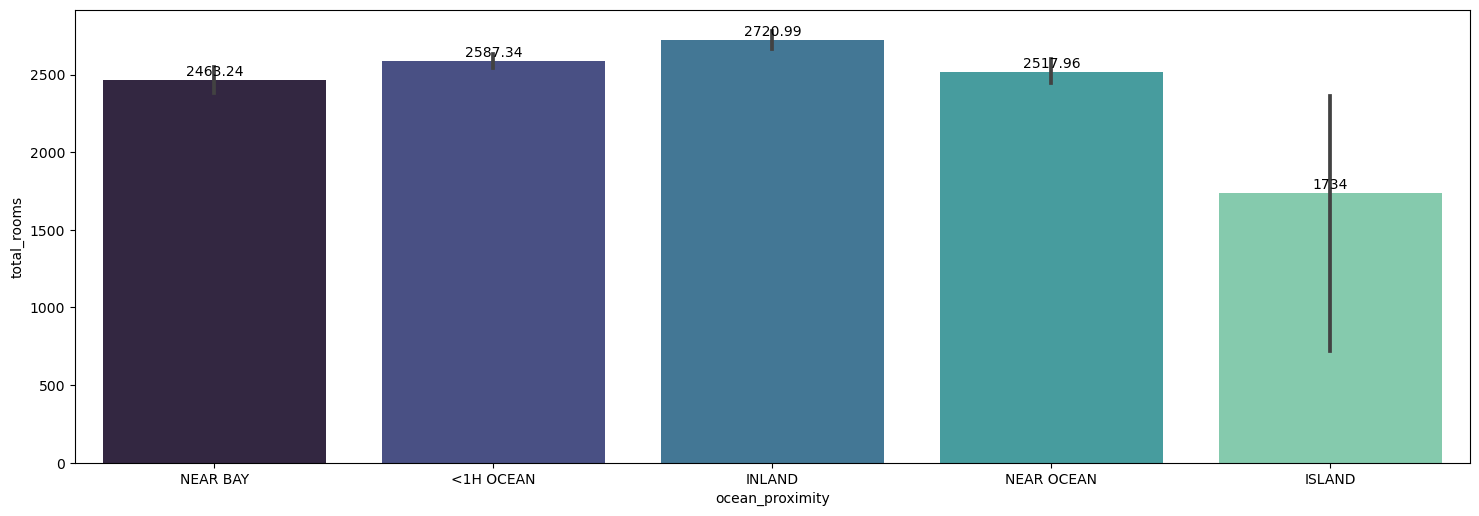

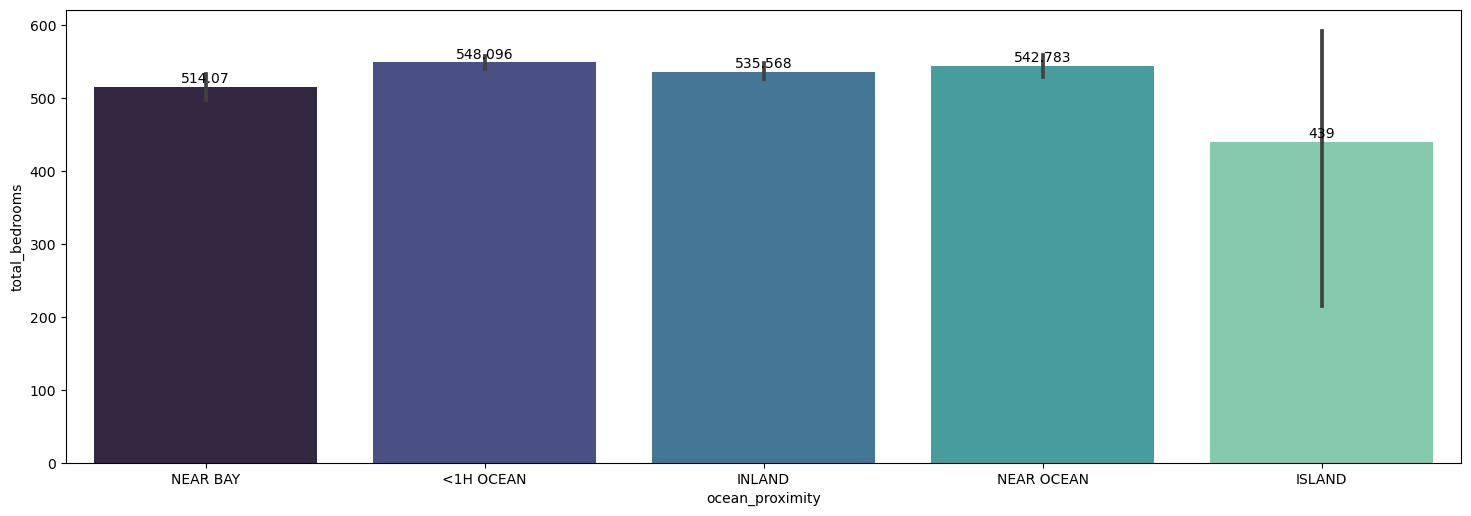

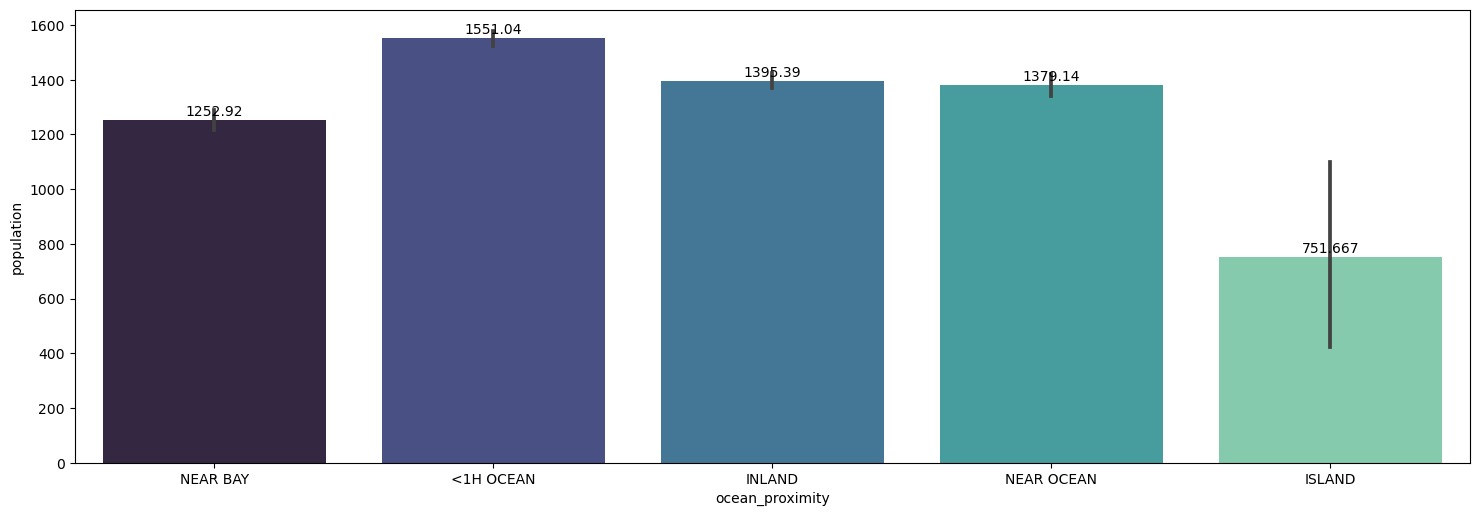

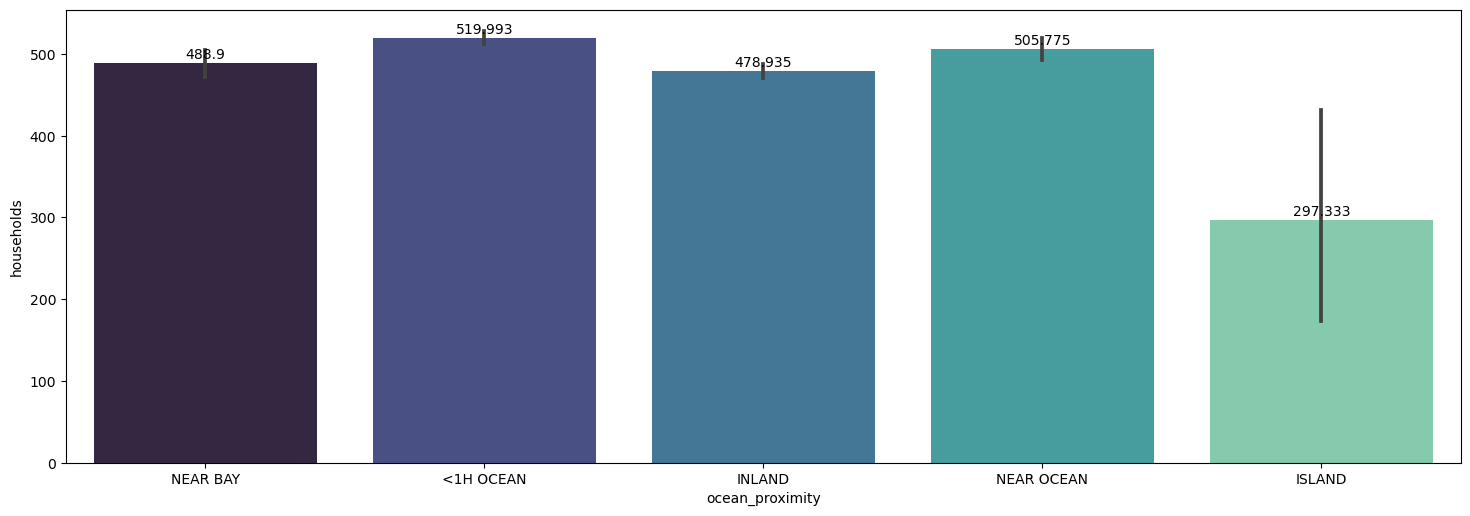

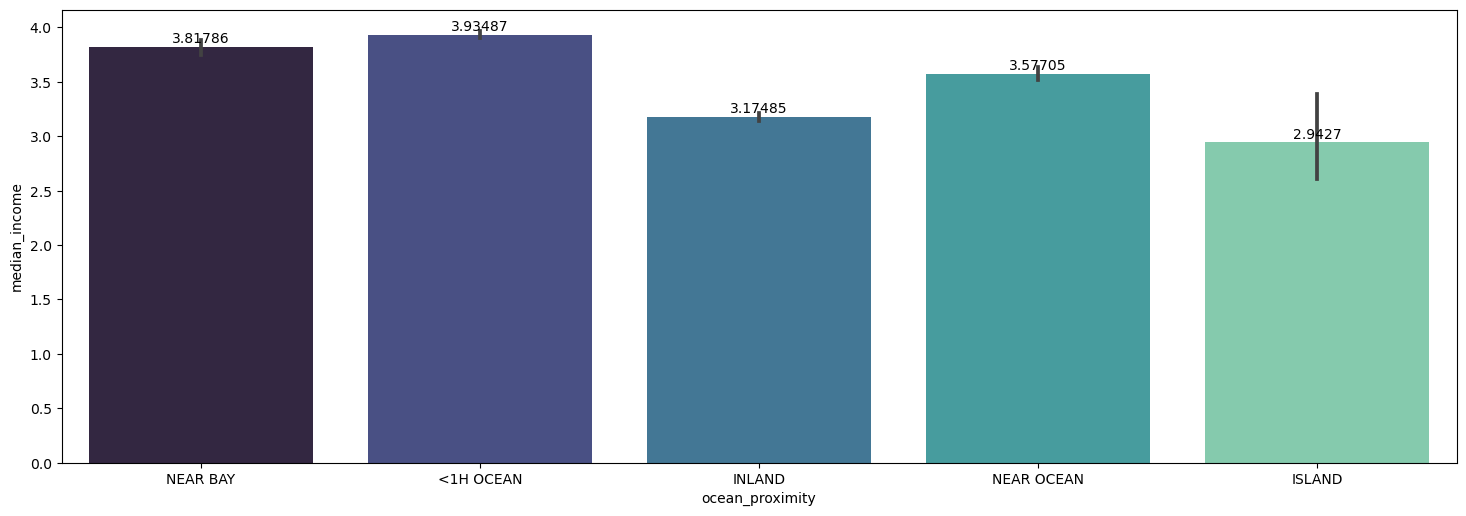

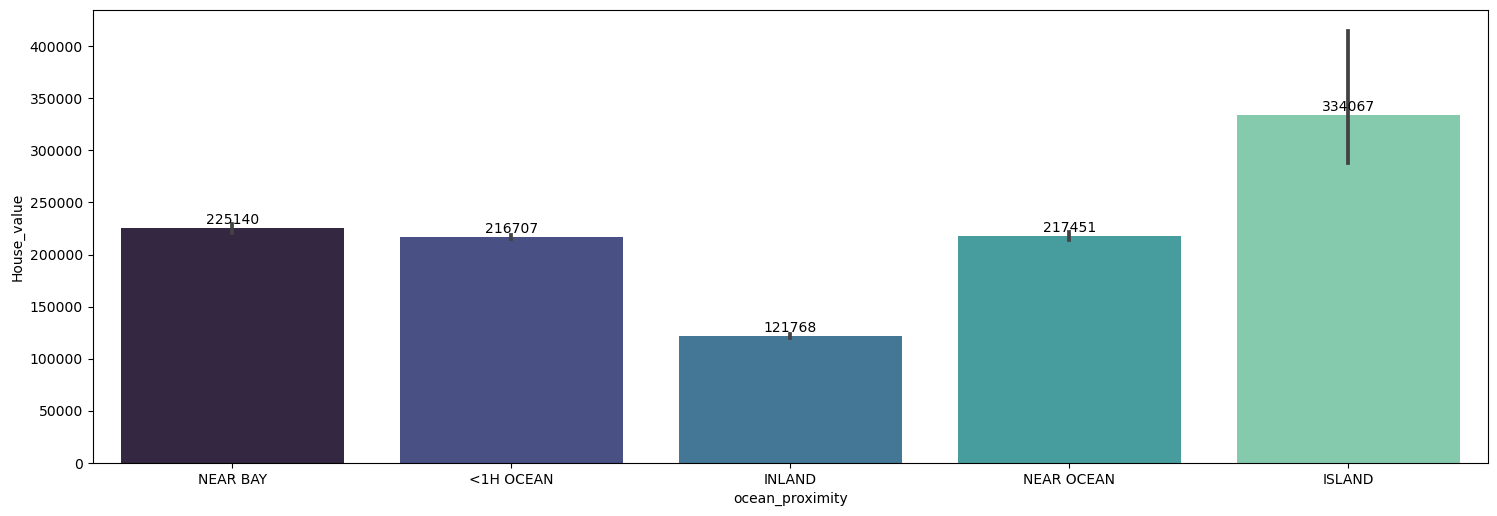

In [21]:
for i,col in enumerate(dff.drop(columns=['longitude','latitude','ocean_proximity'],axis=1)):
    plt.figure(figsize=(18,6),dpi=100)
    fig=sns.barplot(data=dff,x='ocean_proximity',y=col,palette='mako')
    plt.xticks(rotation=0)
    for container in fig.containers:
        fig.bar_label(container,label_type='edge',padding=1)

INSIGHT:
    
    💨 THE ISLAND HOUSES GAT THE MOST OLDIES HOUSE AGE HOUSE
    
    💨 THE MOST ROOM HOUSES AMONG THE OCEAN_PROXIMITY IS THE MAINLAND HOUSES(INLAND HOUSE) 
    
    💨 IN THE PROXIMITY WHERE WE HAVE MOST NUMBER OF ROOM IS ALSO WHERE THE HAVE THE HOUSE THE MOST NUMBER OF BEDROOMS.
    WHICH IS THE INLAND HOUSE(MAINLAND HOUSES)
    
    💨 THE IH_OCEAN GAT THE MOST NUMBER OF HOUSESHOLD
    
    💨IH_OCEAN GAT THE MOST NUMBER OF HOUSEHOLDS
    
    💨THE MOST OCEAN_PROMIXITY MEDIAN INCOME IS IH_OCEAN 
    
    💨WHILE THE MOST EXPENSIVE HOUSES IN THE OCEAN_PROXIMITY IS ISLAND HUOUSES.

# LET mOVE TO ML

In [22]:
#we will be carrying out LinearRegression Model

In [23]:
dff

,longitude,latitude,House_Age,total_rooms,total_bedrooms,population,households,median_income,House_value,ocean_proximity
1,122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [24]:
#i want o convert ocean_proximity to numeric

from sklearn.preprocessing import LabelEncoder

In [25]:
encode=LabelEncoder()

In [26]:
#convertion from object to 

dff['ocean_proximity']=encode.fit_transform(dff['ocean_proximity'])

In [27]:
dff.head(2)

,longitude,latitude,House_Age,total_rooms,total_bedrooms,population,households,median_income,House_value,ocean_proximity
1,122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3


In [29]:
#Problem predicting the Future price for the Next Ocean_proximity

dff.corr().style.background_gradient()

,longitude,latitude,House_Age,total_rooms,total_bedrooms,population,households,median_income,House_value,ocean_proximity
longitude,1.000000,0.923783,0.101271,-0.046283,-0.071980,-0.103357,-0.057960,0.009490,0.044901,0.273519
latitude,0.923783,1.000000,0.005746,-0.033923,-0.069419,-0.116551,-0.074695,-0.075574,-0.155232,0.188530
House_Age,0.101271,0.005746,1.000000,-0.374539,-0.329735,-0.293673,-0.312060,-0.206783,0.048336,0.106280
total_rooms,-0.046283,-0.033923,-0.374539,1.000000,0.935628,0.859556,0.922197,0.224887,0.149778,-0.018039
total_bedrooms,-0.071980,-0.069419,-0.329735,0.935628,1.000000,0.879102,0.978945,0.026570,0.084298,-0.013346
population,-0.103357,-0.116551,-0.293673,0.859556,0.879102,1.000000,0.909337,0.048652,0.028417,-0.069221
households,-0.057960,-0.074695,-0.312060,0.922197,0.978945,0.909337,1.000000,0.051167,0.106337,-0.016988
median_income,0.009490,-0.075574,-0.206783,0.224887,0.026570,0.048652,0.051167,1.000000,0.640149,-0.053285
House_value,0.044901,-0.155232,0.048336,0.149778,0.084298,0.028417,0.106337,0.640149,1.000000,0.051763
ocean_proximity,0.273519,0.188530,0.106280,-0.018039,-0.013346,-0.069221,-0.016988,-0.053285,0.051763,1.000000


In [30]:
#few Negative correlation and while the rest positive

In [31]:
dff.isnull().sum()

longitude            0
latitude             0
House_Age            0
total_rooms          0
total_bedrooms     196
population           0
households           0
median_income        0
House_value          0
ocean_proximity      0
dtype: int64

In [32]:
dff['total_bedrooms']=dff['total_bedrooms'].fillna(dff['total_bedrooms'].median())

In [33]:
dff['total_bedrooms']

1        1106.0
2         190.0
3         235.0
4         280.0
5         213.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 19179, dtype: float64

In [34]:
X=dff.drop(columns=['House_value','longitude','latitude'],axis=1)

y=dff['House_value']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [39]:
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-1.85611554e+00,  1.28351663e-03, -2.01232604e-03, ...,
         2.70052238e-02,  3.24157232e-01, -8.23971101e-01],
       [-1.37719278e+00,  2.69597435e-01,  5.92854306e-01, ...,
         5.01865166e-01, -5.73890946e-01, -1.05858141e-01],
       [-3.39526805e-01,  1.13638782e+00,  1.93663670e+00, ...,
         1.99950037e+00,  2.34873347e-01,  2.04848074e+00],
       ...,
       [-8.98270023e-01, -4.82591074e-01, -7.05898341e-01, ...,
        -7.08766774e-01, -2.61331407e-01, -1.05858141e-01],
       [-1.13773140e+00,  9.91316397e-01,  4.03255379e-01, ...,
         3.60972655e-01,  6.93228064e-01, -1.05858141e-01],
       [ 6.18318712e-01, -2.92042716e-01, -4.45199817e-01, ...,
        -3.43489896e-01,  9.35890323e-01,  1.33036778e+00]])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [41]:
models={'LinearRegression':LinearRegression(),
       'Ridge':Ridge(),
       'Lasso':Lasso(),
       'ElasticNet':ElasticNet()}

In [42]:
Results={'Model':[],
        'Train':[],
        'Test':[],
        'RMSE':[]}

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
for name,model in models.items():
    model.fit(X_train,y_train)
    train_s=model.score(X_train,y_train)
    test_s=model.score(X_test,y_test)
    test_prediction=model.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,test_prediction))
    Results['Model'].append(name)
    Results['Train'].append(train_s)
    Results['Test'].append(test_s)
    Results['RMSE'].append(RMSE)
    print('Model:',name)
    print('Train:',train_s)
    print('Test:',test_s)
    print('RMSE:',round(RMSE,2))
    print('====================')

Model: LinearRegression
Train: 0.5154297299100168
Test: 0.4992682938008942
RMSE: 62200.46
Model: Ridge
Train: 0.5154297289508026
Test: 0.49926940252318286
RMSE: 62200.39
Model: Lasso
Train: 0.5154297297508605
Test: 0.49926866167509976
RMSE: 62200.43
Model: ElasticNet
Train: 0.49085268989284203
Test: 0.48045516779610387
RMSE: 63358.16


In [45]:
#The Train and test of model aven't train and test enough

In [46]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, random_state=101)

In [63]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [64]:
models={'LinearRegression':LinearRegression(),
       'Ridge':Ridge(),
       'Lasso':Lasso(),
       'ElasticNet':ElasticNet()}

In [65]:
Results={'Model':[],
        'Train':[],
        'Test':[],
        'RMSE':[]}

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scal=StandardScaler()

In [68]:
for name,model in models.items():
    model.fit(X_train,y_train)
    train_s=model.score(X_train,y_train)
    test_s=model.score(X_test,y_test)
    test_prediction=model.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,test_prediction))
    Results['Model'].append(name)
    Results['Train'].append(train_s)
    Results['Test'].append(test_s)
    Results['RMSE'].append(RMSE)
    print('Model:',name)
    print('Train:',train_s)
    print('Test:',test_s)
    print('RMSE:',round(RMSE,2))
    print('====================')

Model: LinearRegression
Train: 0.5137780110871262
Test: 0.5113998831727207
RMSE: 60895.32
Model: Ridge
Train: 0.513778010352522
Test: 0.5114016584675627
RMSE: 60895.21
Model: Lasso
Train: 0.5137780109272103
Test: 0.5114006759151877
RMSE: 60895.27
Model: ElasticNet
Train: 0.48924870744634164
Test: 0.49519961086230835
RMSE: 61896.63
